In [2]:
# Importing necessary libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import figure

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


In [4]:
#reading csv file
df = pd.read_csv("Datasets/slider.csv")
df.head()

,file_name,y_min,y_max,y_mean,y_std,zcr_mean,zcr_min,zcr_max,spec_cent_min,spec_cent_mean,spec_roll_min,spec_roll_mean,rms_mean,flat_mean,flat_max,amp_mean,amp_min,melspec_mean,melspec_std,class
0,0_dB_slider/slider/id_00/normal/00000773.wav,-0.026870,0.028764,-1.398502e-06,0.005328,0.047631,0.020020,0.069336,1014.801047,1372.581294,2336.352539,3214.092862,0.005268,0.000342,0.007224,0.013499,0.007090,0.006609,0.029762,0
1,0_dB_slider/slider/id_00/normal/00000632.wav,-0.024040,0.028493,-4.029802e-06,0.005365,0.041871,0.019043,0.087402,720.012314,985.649834,1173.559570,2035.462247,0.005330,0.000147,0.001054,0.014137,0.007547,0.006682,0.024763,0
2,0_dB_slider/slider/id_00/normal/00000238.wav,-0.025671,0.027518,5.779765e-07,0.005878,0.045000,0.019531,0.065430,919.668972,1086.078007,1991.821289,2356.461853,0.005845,0.000183,0.002889,0.015400,0.007993,0.008053,0.028967,0
3,0_dB_slider/slider/id_00/normal/00000148.wav,-0.022808,0.022871,-2.906805e-07,0.005626,0.055353,0.019531,0.078125,1165.522377,1394.776445,2540.917969,3284.712775,0.005581,0.000322,0.010397,0.014580,0.008242,0.007418,0.029873,0
4,0_dB_slider/slider/id_00/normal/00000388.wav,-0.023353,0.023600,-5.806836e-07,0.005836,0.040303,0.017578,0.058594,780.914492,938.608348,1582.690430,1914.206832,0.005797,0.000131,0.004567,0.015175,0.008566,0.007925,0.029198,0


In [5]:
#creating new dataframe

#Necessary data names
dimentions = ['zcr_mean','spec_cent_mean','rms_mean','melspec_mean','amp_mean']

df = df[dimentions]

df.head()

,zcr_mean,spec_cent_mean,rms_mean,melspec_mean,amp_mean
0,0.047631,1372.581294,0.005268,0.006609,0.013499
1,0.041871,985.649834,0.005330,0.006682,0.014137
2,0.045000,1086.078007,0.005845,0.008053,0.015400
3,0.055353,1394.776445,0.005581,0.007418,0.014580
4,0.040303,938.608348,0.005797,0.007925,0.015175


In [6]:
df.rename(columns={'zcr_mean': 'zcr',
                   'spec_cent_mean':'spectral_centroid',
                   'rms_mean': 'rsm',
                   'melspec_mean': 'mel_spectogram',
                   'amp_mean': 'amplitude'}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4094 entries, 0 to 4093
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   zcr                4094 non-null   float64
 1   spectral_centroid  4094 non-null   float64
 2   rsm                4094 non-null   float64
 3   mel_spectogram     4094 non-null   float64
 4   amplitude          4094 non-null   float64
dtypes: float64(5)
memory usage: 160.0 KB


In [8]:
df.isnull().sum()

zcr                  0
spectral_centroid    0
rsm                  0
mel_spectogram       0
amplitude            0
dtype: int64

In Pairplor we will check how features are related to each other.

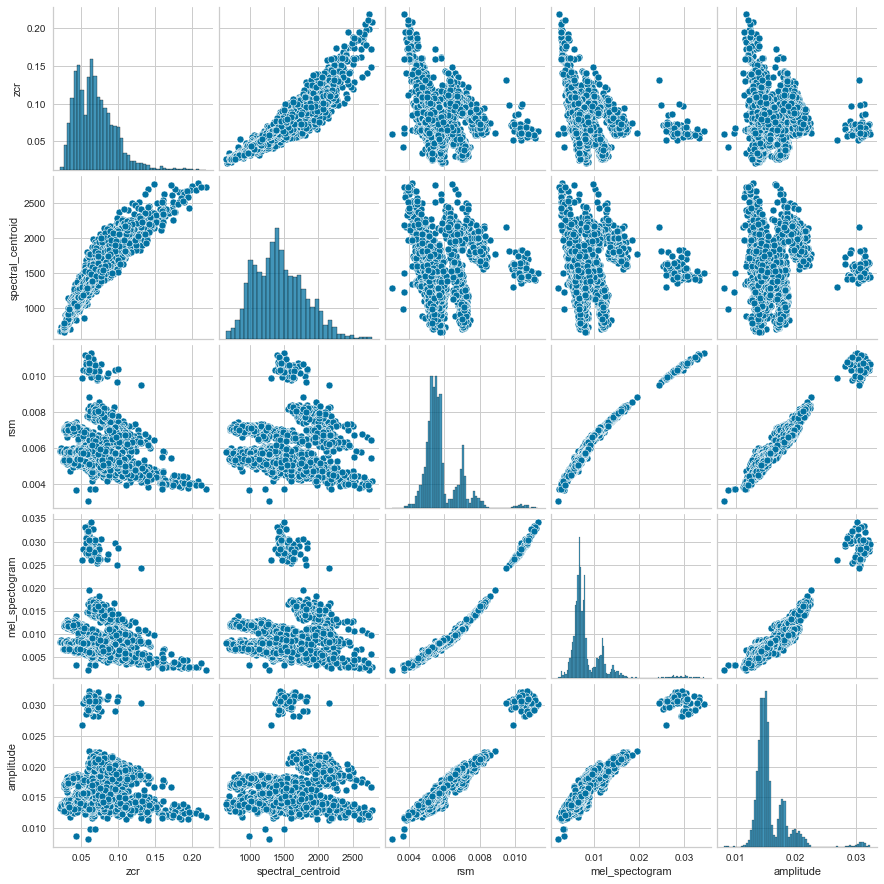

In [9]:
#create a pairplot to dataframe

sns.pairplot(df)

In [10]:
#sns.pairplot(tips,hue='sex')

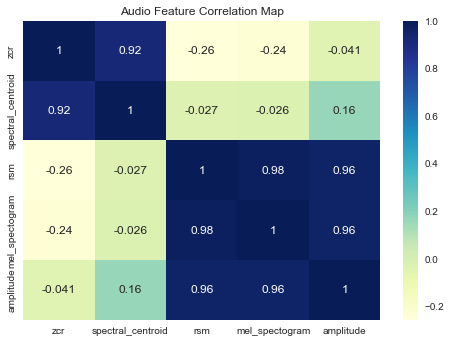

In [11]:
#Creating HeatMap

sns.heatmap(df.corr(),cmap="YlGnBu", annot=True);
plt.title("Audio Feature Correlation Map");

Text(0, 0.5, 'Spectral Centroid')

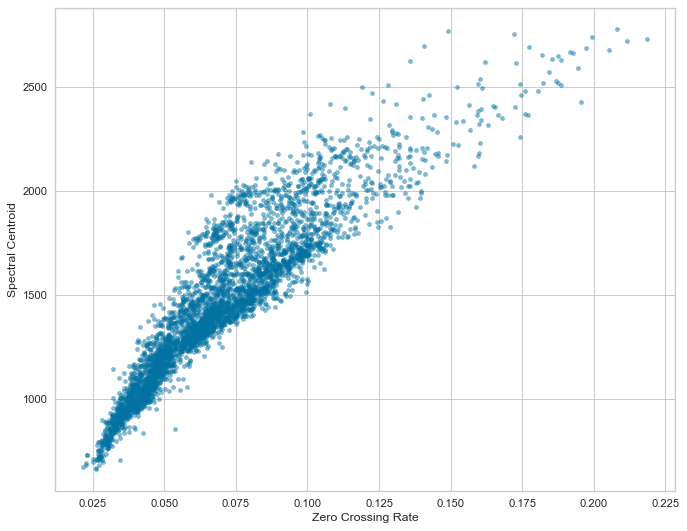

In [12]:
# Let's observe relationships between Zero Crossing Rate and Spectral Centroid
# positive, strong and linear 
figure(figsize=(10, 8), dpi=80)
plt.scatter(df['zcr'], df['spectral_centroid'], s=15, alpha=0.5)
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [13]:
# scaling data
scale = StandardScaler()
StdScale = scale.fit_transform(df)

n_max_clusters = 10

# Elbow Method
wcss = []
for cluster in range(1,n_max_clusters):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(StdScale)
    wcss.append(kmeans.inertia_)

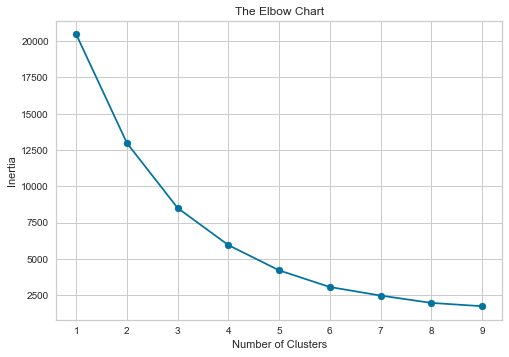

In [14]:
# plotting elbow graphics

plt.plot(range(1,n_max_clusters), wcss)
plt.scatter(range(1,n_max_clusters), wcss)

plt.title('The Elbow Chart')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.show()

In [15]:
k = 3

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=k, init='k-means++').fit(df)

y_kmeans = kmeans.predict(df)

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
df = df.join(cluster_labels.to_frame())

In [16]:
c0 = (df.cluster == 0).sum()
c1 = (df.cluster == 1).sum()
c2 = (df.cluster == 2).sum()

total = c0 + c1 + c2
print('Total number of data ', total)
print('Percentage of cluster 0 ', c0/total)
print('Percentage of cluster 1 ', c1/total)
print('Percentage of cluster 2 ', c2/total)

Total number of data  4094
Percentage of cluster 0  0.4457743038593063
Percentage of cluster 1  0.2381533952125061
Percentage of cluster 2  0.3160723009281876


In [17]:
df.head()

,zcr,spectral_centroid,rsm,mel_spectogram,amplitude,cluster
0,0.047631,1372.581294,0.005268,0.006609,0.013499,0
1,0.041871,985.649834,0.005330,0.006682,0.014137,2
2,0.045000,1086.078007,0.005845,0.008053,0.015400,2
3,0.055353,1394.776445,0.005581,0.007418,0.014580,0
4,0.040303,938.608348,0.005797,0.007925,0.015175,2


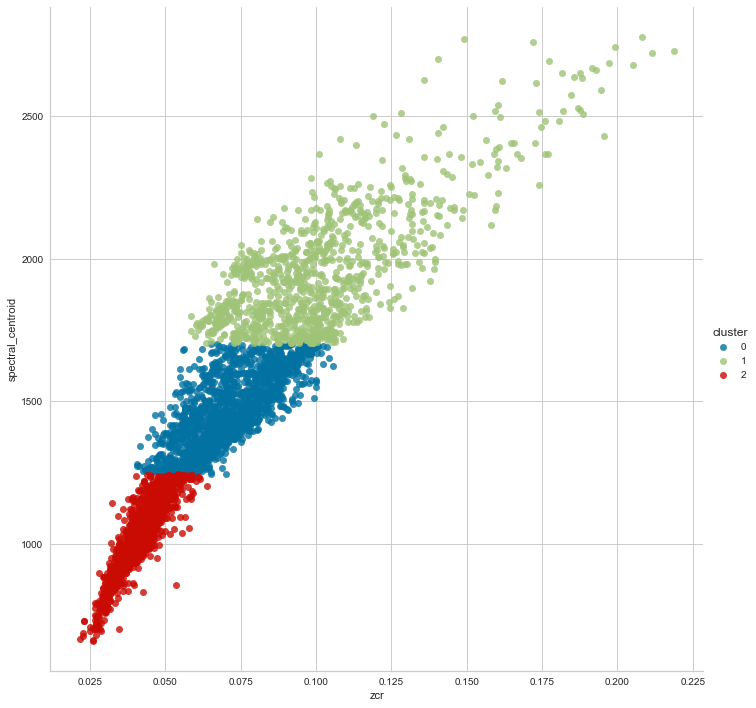

In [18]:
sns.lmplot(x='zcr', y='spectral_centroid',  height=10, data=df,
           fit_reg=False, hue='cluster')

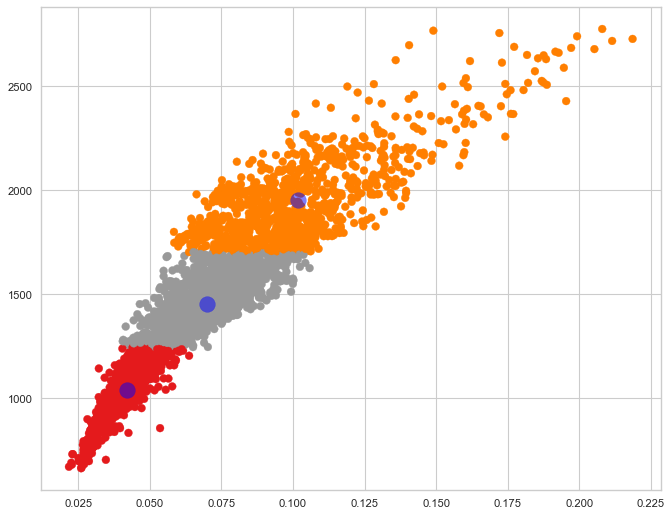

In [19]:
figure(figsize=(10, 8), dpi=80)
plt.scatter(df['zcr'], df['spectral_centroid'], c=y_kmeans, s=50, cmap='Set1_r')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5);

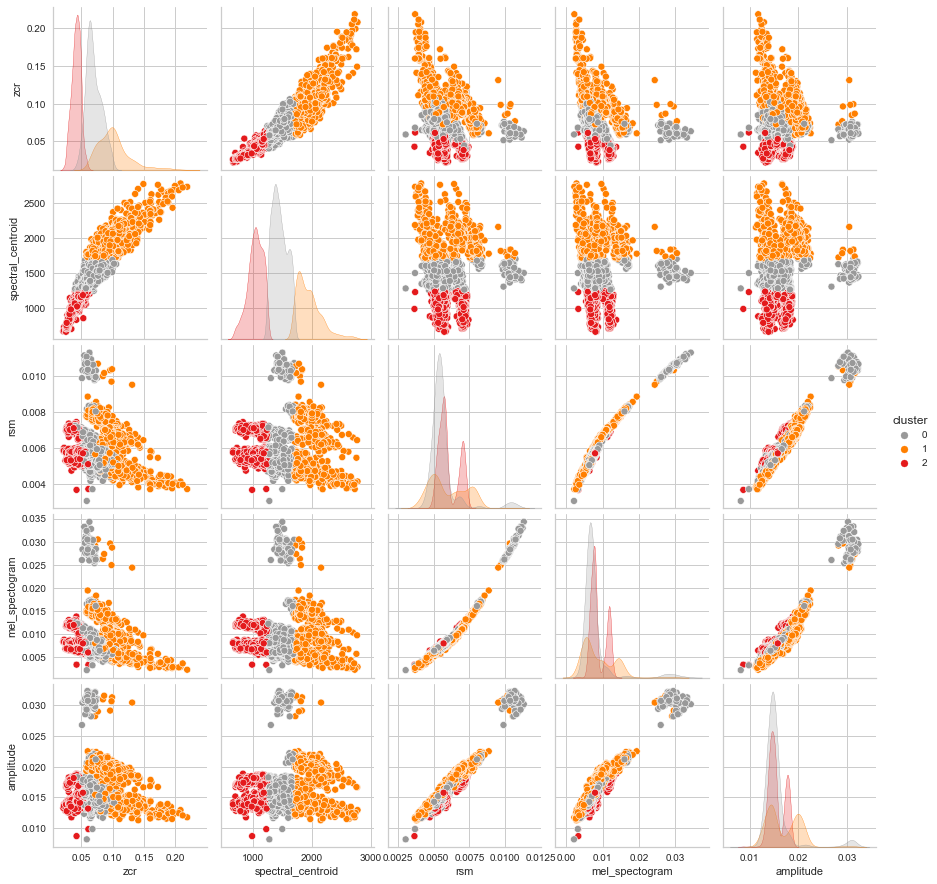

In [20]:
sns.pairplot(df, palette = 'Set1_r', hue='cluster');

In [21]:
def plot_cluster(k):
    
    fig = plt.figure()

    km = KMeans(n_clusters=k, init='k-means++', random_state=42)

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(df) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data
    
    



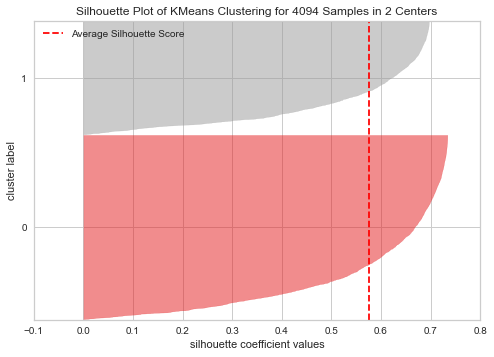

In [22]:
# Silhouette Plot in k =2
plot_cluster(2)

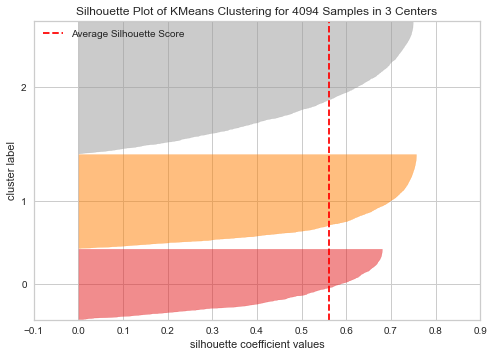

In [24]:
# Silhouette Plot in k = 3
plot_cluster(3)

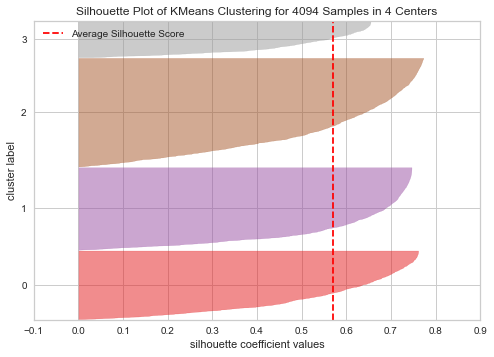

In [25]:
# Silhouette Plot in k =4

plot_cluster(4)

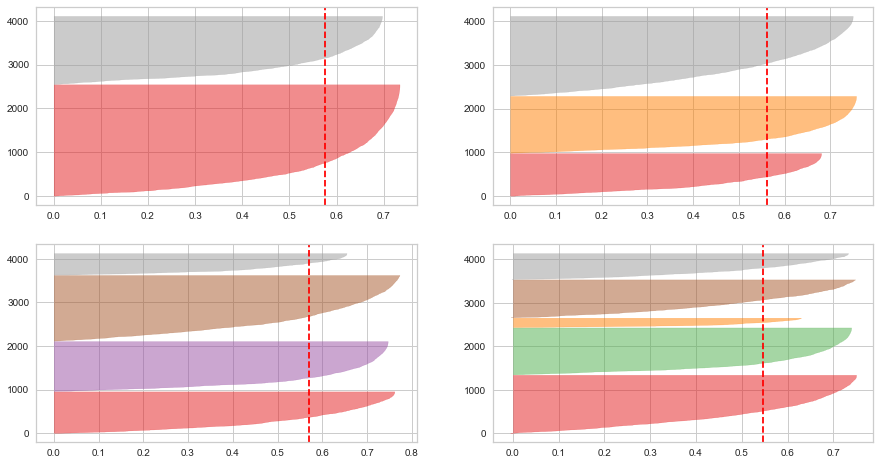

In [26]:

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, ax=ax[q-1][mod])
    visualizer.fit(df)
